<a href="https://colab.research.google.com/github/Dannyyang0329/ML_Iris_kNN/blob/main/Iris_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - kNN using Iris as sample data


## Step 1 - Import packages

In [3]:
! git clone https://github.com/Dannyyang0329/ML_Iris_kNN.git

Cloning into 'ML_Iris_kNN'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 2 - Load Dataset into a Pandas DataFrame

In [5]:
df_iris = pd.read_csv("ML_Iris_kNN/iris.csv")
df_iris

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Step 3 - Get Features and targets into a NumPy Array

In [8]:
# only choose two feature "PetalLength" and "PetalWidth" as example.
X = df_iris[["PetalLength[cm]", "PetalWidth[cm]"]].values

In [17]:
label_dict = {"Iris-setosa" : 0, 
              "Iris-versicolor" : 1,
              "Iris-virginica" : 2}

# add a new column to df_iris's column
df_iris["ClassLabel"] = df_iris["Species"].map(label_dict)
# show the last 5 instances
df_iris.tail()

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species,ClassLabel
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,2


In [18]:
y = df_iris["ClassLabel"].values

## Step 4 - Shuffle Dataset and Create Training and Test Subsets

### 4-1 Triditional method

In [20]:
indices = np.arange(X.shape[0])
indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

In [22]:
rnd = np.random.RandomState(123)
shuffled_indices = rnd.permutation(indices)
shuffled_indices

array([ 72, 112, 132,  88,  37, 138,  87,  42,   8,  90, 141,  33,  59,
       116, 135, 104,  36,  13,  63,  45,  28, 133,  24, 127,  46,  20,
        31, 121, 117,   4, 130, 119,  29,   0,  62,  93, 131,   5,  16,
        82,  60,  35, 143, 145, 142, 114, 136,  53,  19,  38, 110,  23,
         9,  86,  91,  89,  79, 101,  65, 115,  41, 124,  95,  21,  11,
       103,  74, 122, 118,  44,  51,  81, 149,  12, 129,  56,  50,  25,
       128, 146,  43,   1,  71,  54, 100,  14,   6,  80,  26,  70, 139,
        30, 108,  15,  18,  77,  22,  10,  58, 107,  75,  64,  69,   3,
        40,  76, 134,  34,  27,  94,  85,  97, 102,  52,  92,  99, 105,
         7,  48,  61, 120, 137, 125, 147,  39,  84,   2,  67,  55,  49,
        68, 140,  78, 144, 111,  32,  73,  47, 148, 113,  96,  57, 123,
       106,  83,  17,  98,  66, 126, 109])

In [25]:
X_shuffled, y_shuffled = X[shuffled_indices], y[shuffled_indices]

# choose first 105 samples as train data
X_train, y_train = X_shuffled[:105], y_shuffled[:105]
# choose last 45 samples as test data
X_test, y_test = X_shuffled[105:], y_shuffled[105:]

### 4-2 Scikit-Learn

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 123,
                                                    shuffle = True)

## Step 5 - Plot Dataset (visualization)

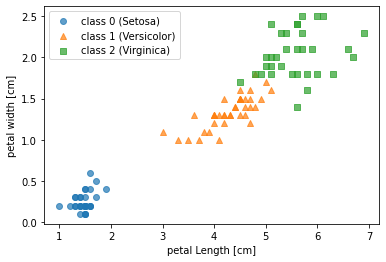

In [29]:
# class 0 Setosa
plt.scatter(X_train[y_train == 0, 0],
            X_train[y_train == 0, 1], 
            alpha = 0.7, 
            marker = "o",
            label = "class 0 (Setosa)")

# class 1 Versicolor
plt.scatter(X_train[y_train == 1, 0],
            X_train[y_train == 1, 1], 
            alpha = 0.7, 
            marker = "^",
            label = "class 1 (Versicolor)")

# class 2 Virginica
plt.scatter(X_train[y_train == 2, 0],
            X_train[y_train == 2, 1], 
            alpha = 0.7, 
            marker = "s",
            label = "class 2 (Virginica)")

plt.xlabel("petal Length [cm]")
plt.ylabel("petal width [cm]")
plt.legend(loc = "upper left")

plt.show()

## Step 6 - Fit k-Nearest Neighbor Model

In [32]:
# check how to use KNeighborsClassifier
KNeighborsClassifier?

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Step 7 - Use kNN Model to Make Predictions

In [37]:
# Triditional way
y_pred = knn_model.predict(X_test)

num_correct_predictions = (y_pred == y_test).sum()
accuracy = (num_correct_predictions / y_test.shape[0]) * 100

print(f"Test set accuracy : {accuracy:.2f}%")

Test set accuracy : 95.56%


In [38]:
# pro method
print(f"Test set accuracy : {knn_model.score(X_test, y_test)*100:.2f}%")

Test set accuracy : 95.56%


## Step 8 - Visualize Decision Boundary

In [39]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


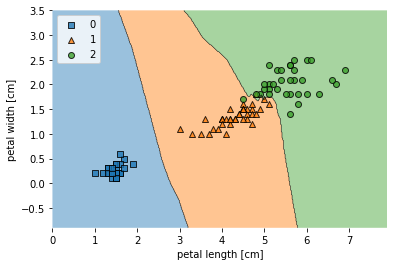

In [40]:
from mlxtend.plotting import plot_decision_regions

# training instances decision boundary
plot_decision_regions(X_train, y_train, knn_model)
plt.xlabel("petal length [cm]")
plt.ylabel("petal width [cm]")
plt.legend(loc = "upper left")

plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


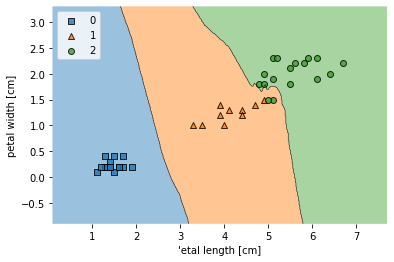

In [41]:
# testing instances decision boundary
plot_decision_regions(X_test, y_test, knn_model)
plt.xlabel("'etal length [cm]")
plt.ylabel("petal width [cm]")
plt.legend(loc = "upper left")
plt.show()